In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import signal
import scipy.io.wavfile
from scipy.io.wavfile import write
import IPython

# آ)
ابتدا فایل را خوانده و سمپل ریت را استخراج میکنیم
سپس سیگنال را در حوزه زمان نمایش میدهیم

44100


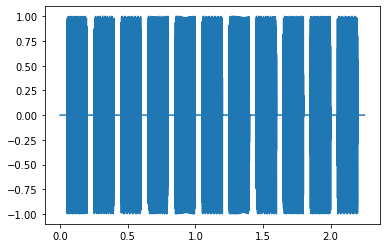

In [2]:
all_data= scipy.io.wavfile.read("./tone.wav")
sample_count = len(all_data[1])
sample_rate = all_data[0]
# T = 0.06116 s
signal =all_data[1][:sample_count]
t=np.arange(0,10 ,step=1/sample_rate)
plt.plot(t[:sample_count],signal)
print(sample_rate)

# ب)
حال کل سیگنال را به حوزه فرکانس برده و رسم میکنیم

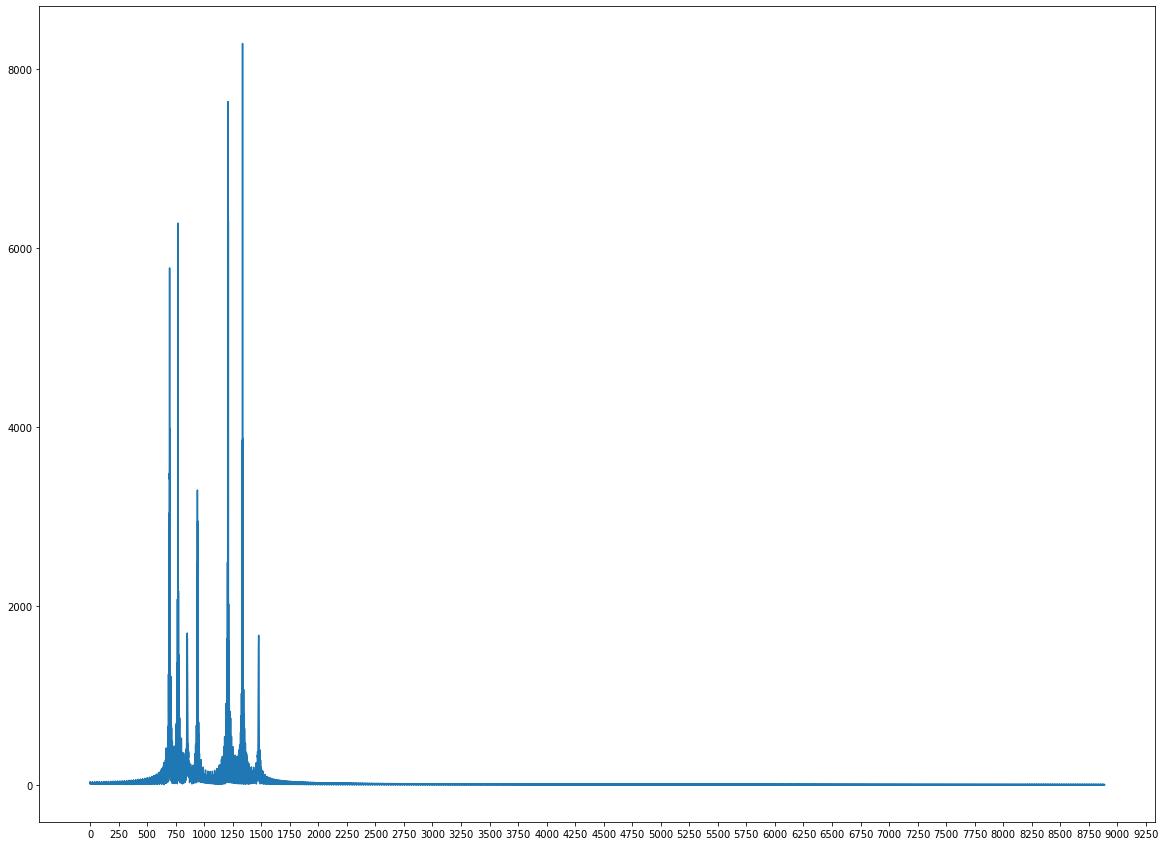

In [3]:
fourier = np.fft.fft(signal)
n = signal.size
timestep = 1/sample_rate
freq = np.fft.fftfreq(n, d=timestep)
count =20000
plt.figure(figsize=(20,15))
plt.xticks(range(0,10000,250))
plt.plot(freq[:count],abs(fourier[:count]))


همانطور که میبینیم پس از تبدیل فرکانس ها را داریم و کلیدها را به سختی میتوان بدست اورد اما  ما به دنبال ترتیب وارد شدن کلید ها هستیم پس باید زمان را تقسیم کرده و فوریه هر تیکه زمانی را جدا حساب کرد

In [4]:
def cal_fourier_and_interpolation(time_domain_signal , timestep = 1/sample_rate , freq_count=2000):
    fourier = np.fft.fft(time_domain_signal)
    n = time_domain_signal.size
    freq = np.fft.fftfreq(n, d=timestep)
    x=np.arange(0,freq_count ,step=1)
    return x,np.interp(x, freq[1:n//2] ,abs(fourier)[1:n//2])


این متد سیگنال در حوزه زمان را گرفته و فوریه ان را محاسبه کرده و یک آرایه به طول ۲۰۰۰ برمیگرداند که هر  خانه از این آرایه نشان دهنده مقدار ان فرکانس است 
برای مثال خانه ۱۰ ام ارایه نشان دهنده اندازه فرکانس ۱۰ در حوزه فرکانس این سیگنال است
این کار را به وسیله درونیابی انجام میدهیم

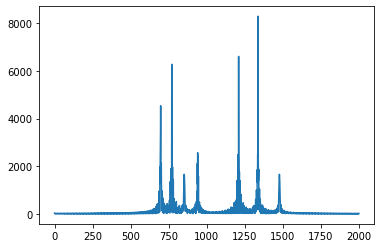

In [5]:
plt.plot(*cal_fourier_and_interpolation(signal))

    

همانطور که میبینیم شکل همان شکل  بالا است 
اما فرکانس هارا از ۱ تا ۲۰۰۰ نشان داده است


# پ)
حال با تیکه تیکه کردن سیگنال در حوزه زمان و تبدیل هر تیکه به حوزه فرکانس شماره گرفته شده را بدست میاوریم

In [23]:


def split_padded(a,n):
    splitedSize = n
    return  [a[x:x+splitedSize] if len(a[x:x+splitedSize])==splitedSize else np.array([0]*n) for x in range(0, len(a), splitedSize)]

def split_and_calculate(signal ,window_size ):
    
    sub_signals = split_padded(signal,window_size)
    results = []
    for i,s in enumerate(sub_signals):
        freq ,abs_fourier= cal_fourier_and_interpolation(s)
        results+= [abs_fourier]*int(window_size/1000)
    
    X=np.stack(results, axis=0)
    return X.T


فانکشن اول یک ارایه را تقسیم بندی به چند ارایه با طول یکسان میکند

و فانکشین دوم پس از تقسیم بندی زمانی هر تیکه را به حوزه فرکانس میبرد
و یک ماترسی با اندازه طول سطر ها برمیگرداند

محور افقی برا اساس میلی ثانیه است

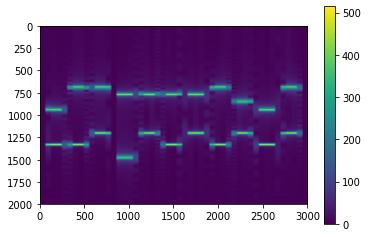

In [24]:
X =split_and_calculate(signal ,2048)

plt.imshow(X,extent=[0,3000,2000,0])
plt.colorbar()



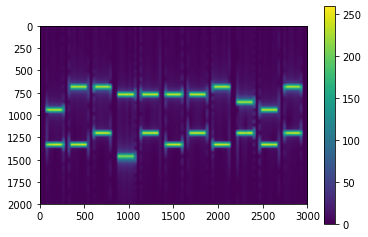

In [16]:
X =split_and_calculate(signal ,1024 )

plt.imshow(X,extent=[0,3000,2000,0])
plt.colorbar()



# ت)
حال زمان یافتن شماره ها به ترتیب زمانی فرارسیده است

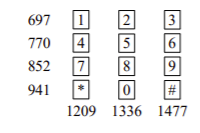

همانطور که فرکانس شماره ها و طیف فرکانس بر زمان را میبینیم شماره گرفته شده

# 02164542701

است که شماره ای آشنا هست


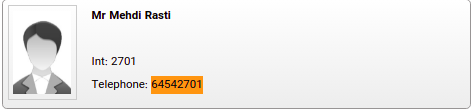

# ت) 
### امتیازی

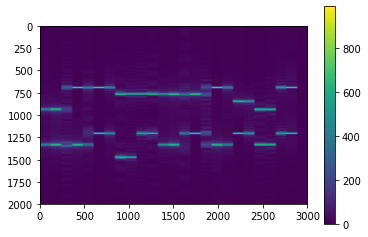

In [25]:
X =split_and_calculate(signal ,4048 )

plt.imshow(X, extent=[0,3000,2000,0])
plt.colorbar()

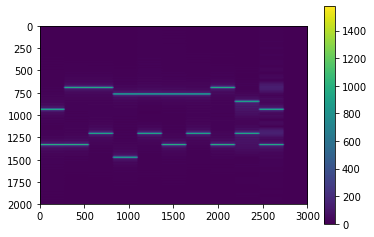

In [26]:
X =split_and_calculate(signal ,window_size=9096 )

plt.imshow(X, extent=[0,3000,2000,0])
plt.colorbar()

همانطور که در مثال های بالا میبینیم هر چه اندازه پنجره را زیاد کنیم در واقع دو اتفاق میافتد

اولا چون سیگنال بیشتری را در حوزه زمان به حوزه فرکانس برده ایم  فرکانس های دخیل کمتر و دقیق تر نشان داده میشوند چون هرچه محتوای سیگنال در حوزه زمان کمتر باشد به تعداد فرکانس بیشتری برای نمایش ان در حوزه فرکانس نیاز است
برای مثال اگر پنجره ما ۱ باشد انگار تابع ضربه را به حوزه فرکانس برده ایم ک در این صورت تعداد  زیادی
از فرکانس ها برای این سیگنال نیاز است
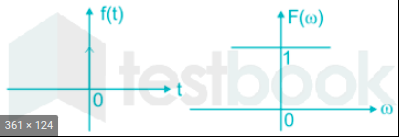

دوما هر چه این مقدار بیشتر شود تفکیک فرکانس های کلید ها از هم سخت تر میشود 
برای مثال اگر طول پنجره را به اندازه کل طول سیگنال بگذاریم  فقط  میتوانیم فرکانس های تشکیل دهنده سیگنال را ببینیم 
و ترتیب انها و  ترتیب کلید ها تفکیک ناپذیر هستند


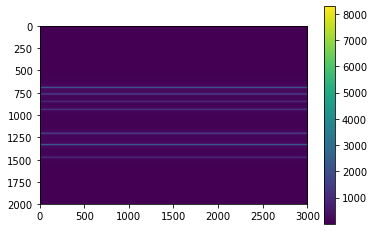

In [27]:
X =split_and_calculate(signal ,window_size=len(signal) )

plt.imshow(X, extent=[0,3000,2000,0])
plt.colorbar()

# برای فایل سمپل هم اگر بخواهیم رسم کنیم

44100


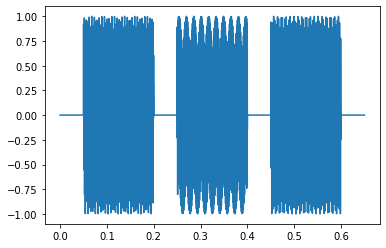

In [29]:
example_all_data= scipy.io.wavfile.read("./sample.wav")
example_sample_count = len(example_all_data[1])
example_sample_rate = example_all_data[0]
# T = 0.06116 s
example_signal =example_all_data[1][:example_sample_count]
t=np.arange(0,10 ,step=1/example_sample_rate)
plt.plot(t[:example_sample_count],example_signal)
print(example_sample_rate)

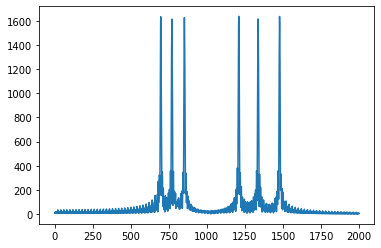

In [31]:
plt.plot(*cal_fourier_and_interpolation(example_signal))

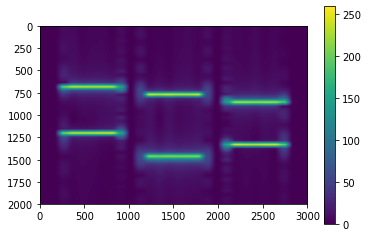

In [32]:
X =split_and_calculate(example_signal ,1024 )

plt.imshow(X,extent=[0,3000,2000,0])
plt.colorbar()


# 168 = sample.wave